<a href="https://www.kaggle.com/code/ahmedalaaelsayed/titanic-machine-learning-from-disaster?scriptVersionId=135433092" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.model_selection import train_test_split

titanic_train = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Get rid of any row with Survived=NaN
titanic_train.dropna(subset=['Survived'], inplace=True)

# The full training data before cleaning and handling
X = titanic_train.drop('Survived', axis=1)
y = titanic_train.Survived

full_X = X.copy()
full_y = y.copy()

# There is no need for the name or Ticket so i will drop them
X = X.drop(['Name', 'Ticket'], axis=1)
titanic_test_X = titanic_test.drop(['Name', 'Ticket'], axis=1)

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


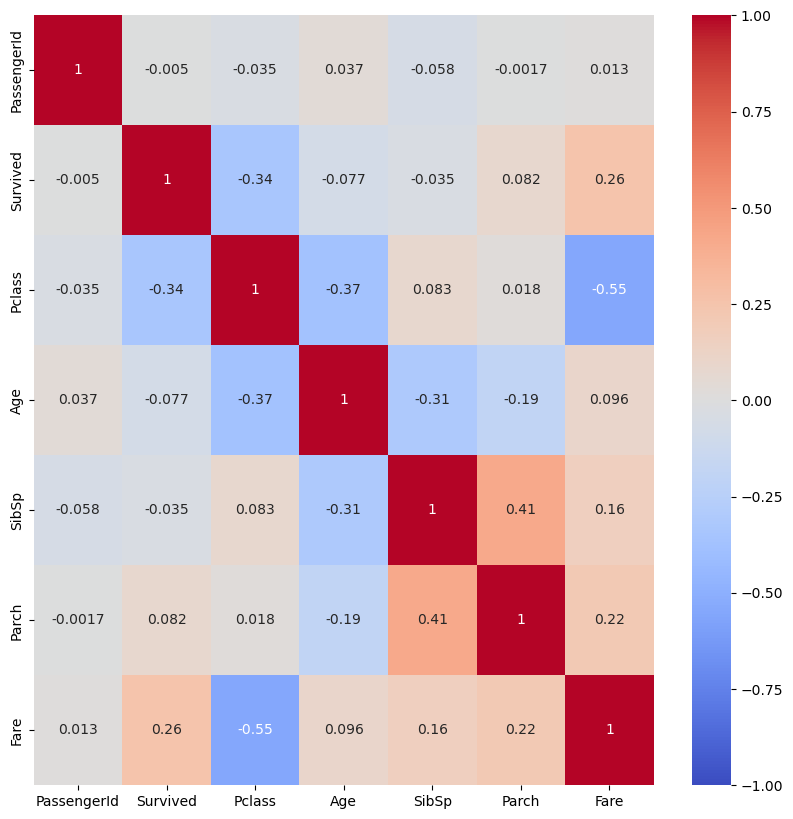

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = titanic_train.corr(numeric_only=True)
plt.figure(figsize= (10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

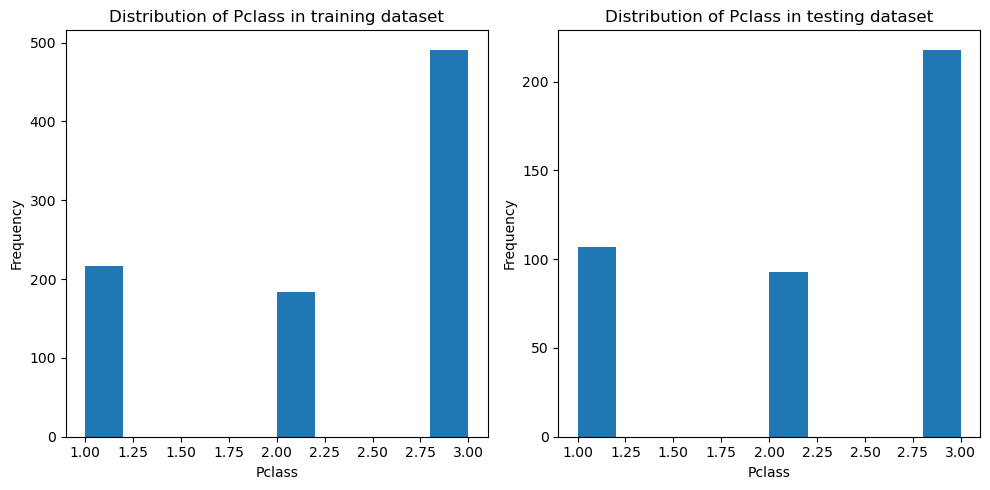

In [4]:
import matplotlib.pyplot as plt

# Show the distribution of the Pclass in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of the Pclass in training dataset
axes[0].hist(titanic_train.Pclass, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Pclass in training dataset')

# Plot 2 - Distribution of Pclass in testing dataset
axes[1].hist(titanic_test.Pclass, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Pclass in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

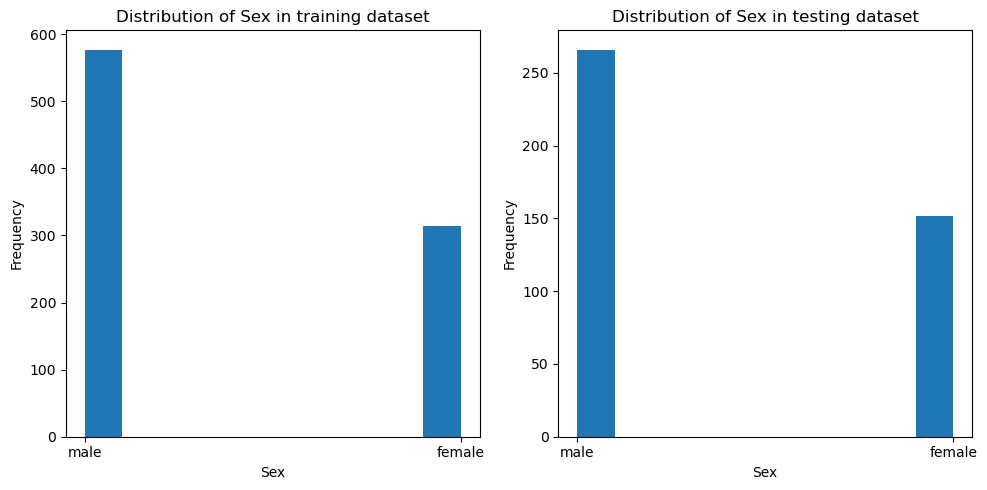

In [5]:
import matplotlib.pyplot as plt

# Show the distribution of the Sex in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of Sex in training dataset
axes[0].hist(titanic_train.Sex, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sex in training dataset')

# Plot 2 - Distribution of Sex in testing dataset
axes[1].hist(titanic_test.Sex, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Sex in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

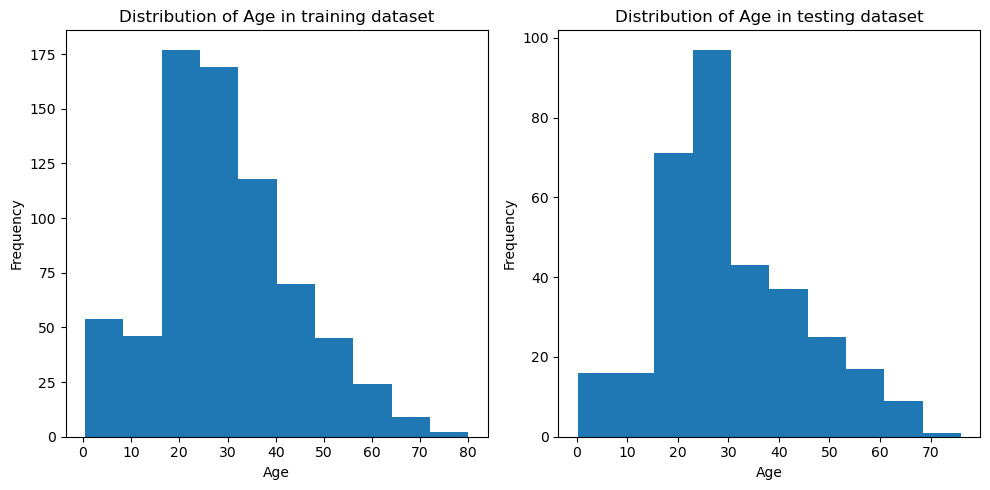

In [6]:
import matplotlib.pyplot as plt

# Show the distribution of the Age in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of the Age in training dataset
axes[0].hist(titanic_train.Age, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Age in training dataset')

# Plot 2 - Distribution of Age in testing dataset
axes[1].hist(titanic_test.Age, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Age in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

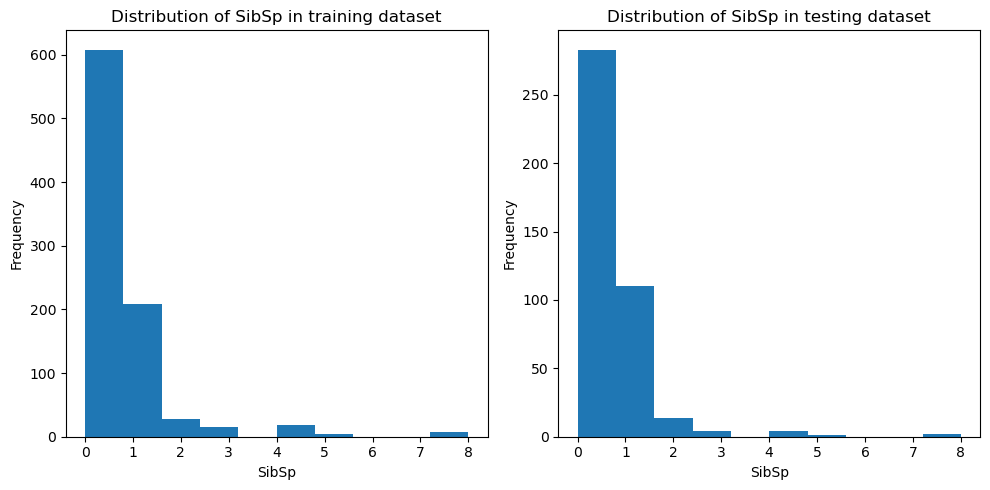

In [7]:
import matplotlib.pyplot as plt

# Show the distribution of the SibSp in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of the SibSp in training dataset
axes[0].hist(titanic_train.SibSp, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('SibSp')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SibSp in training dataset')

# Plot 2 - Distribution of SibSp in testing dataset
axes[1].hist(titanic_test.SibSp, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('SibSp')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of SibSp in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

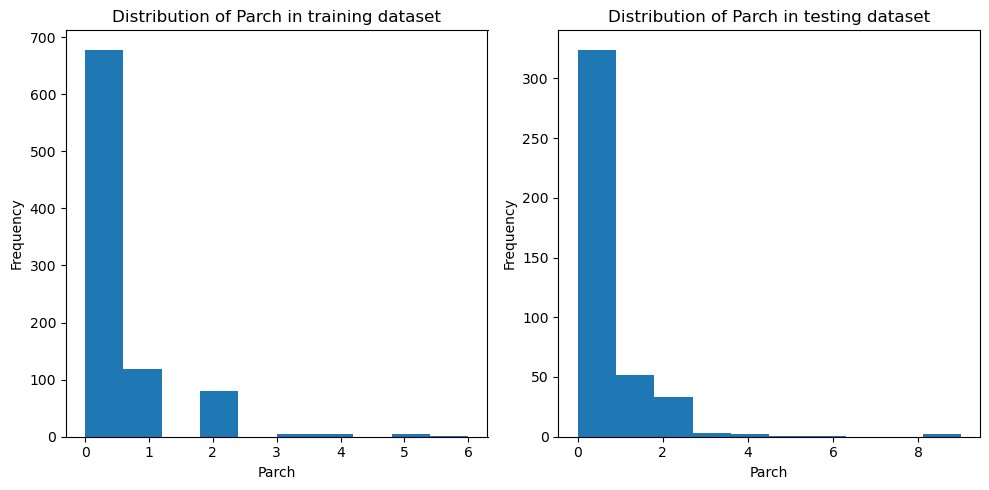

In [8]:
import matplotlib.pyplot as plt

# Show the distribution of the Parch in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of the Parch in training dataset
axes[0].hist(titanic_train.Parch, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Parch')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Parch in training dataset')

# Plot 2 - Distribution of Parch in testing dataset
axes[1].hist(titanic_test.Parch, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Parch')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Parch in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

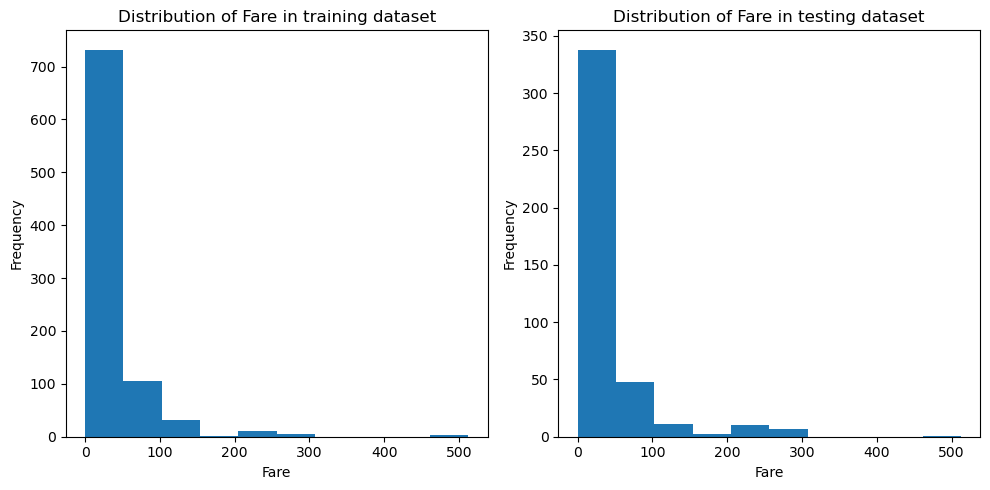

In [9]:
import matplotlib.pyplot as plt

# Show the distribution of the Fare in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of Fare in training dataset
axes[0].hist(titanic_train.Fare, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fare in training dataset')

# Plot 2 - Distribution of Fare in testing dataset
axes[1].hist(titanic_test.Fare, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Fare in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

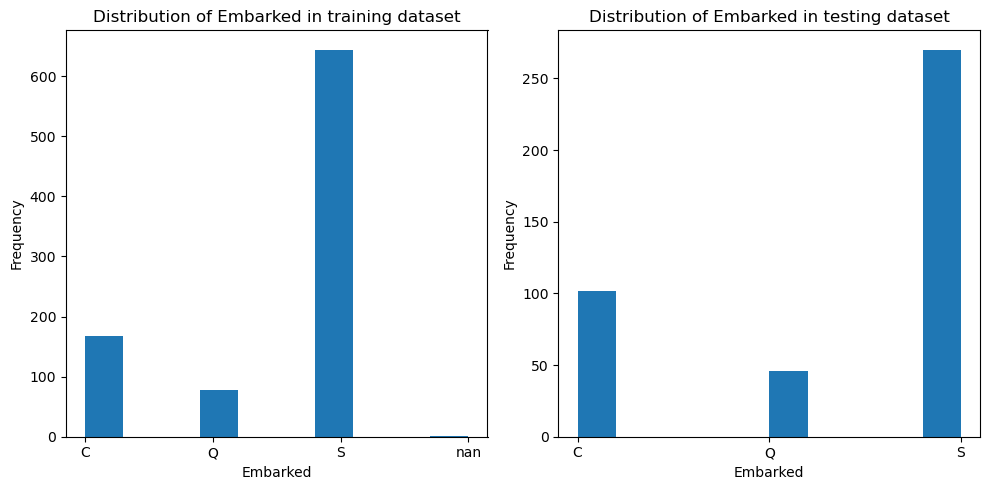

In [10]:
import matplotlib.pyplot as plt

# Show the distribution of the Embarked in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of Embarked in training dataset
axes[0].hist(titanic_train.Embarked.astype('str').sort_values(), bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Embarked')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Embarked in training dataset')

# Plot 2 - Distribution of Embarked in testing dataset
axes[1].hist(titanic_test.Embarked.astype('str').sort_values(), bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Embarked in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [11]:
# Get some info about the problems with the provided data
columns_with_missing_val = [col for col in X.columns if X[col].isnull().any()]
numerical_cols = [col for col in X.columns if not X[col].dtype == 'object']
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

print(columns_with_missing_val)
print(numerical_cols)
print(categorical_cols)

['Age', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Cabin', 'Embarked']


In [12]:
from sklearn.impute import SimpleImputer

# Preprocessing for numerical data by imputing the missing values with the median of the column has missing values
numerical_imputer = SimpleImputer(strategy='median')

numerical_imputed_X_train = pd.DataFrame(numerical_imputer.fit_transform(X_train[numerical_cols]))
numerical_imputed_X_valid = pd.DataFrame(numerical_imputer.transform(X_valid[numerical_cols]))

numerical_imputed_X_train.columns = X_train[numerical_cols].columns
numerical_imputed_X_valid.columns = X_valid[numerical_cols].columns

another_numerical_imputer = SimpleImputer(strategy='median')

numerical_imputed_full_X = pd.DataFrame(another_numerical_imputer.fit_transform(full_X[numerical_cols]))
numerical_imputed_test_X = pd.DataFrame(another_numerical_imputer.transform(titanic_test_X[numerical_cols]))

numerical_imputed_full_X.columns = full_X[numerical_cols].columns
numerical_imputed_test_X.columns = titanic_test_X[numerical_cols].columns

numerical_imputed_X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,141.0,3.0,29.0,0.0,2.0,15.2458
1,440.0,2.0,31.0,0.0,0.0,10.5000
2,818.0,2.0,31.0,1.0,1.0,37.0042
3,379.0,3.0,20.0,0.0,0.0,4.0125
4,492.0,3.0,21.0,0.0,0.0,7.2500


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for categorical data
# 1. Handle the missing data with the mode value for the columns has missing values
categorical_imputer = SimpleImputer(strategy='most_frequent')

categorical_imputed_X_train = pd.DataFrame(categorical_imputer.fit_transform(X_train[categorical_cols]))
categorical_imputed_X_valid = pd.DataFrame(categorical_imputer.transform(X_valid[categorical_cols]))

categorical_imputed_X_train.columns = X_train[categorical_cols].columns
categorical_imputed_X_valid.columns = X_valid[categorical_cols].columns

another_categorical_imputer = SimpleImputer(strategy='most_frequent')

categorical_imputed_full_X = pd.DataFrame(another_categorical_imputer.fit_transform(full_X[categorical_cols]))
categorical_imputed_test_X = pd.DataFrame(another_categorical_imputer.transform(titanic_test_X[categorical_cols]))

categorical_imputed_full_X.columns = full_X[categorical_cols].columns
categorical_imputed_test_X.columns = titanic_test_X[categorical_cols].columns

# 2. Handle the categorical variables by encoding it to one-hot vectors
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

categorical_imputed_encoded_X_train = pd.DataFrame(onehot_encoder.fit_transform(X_train[categorical_cols]))
categorical_imputed_encoded_X_valid = pd.DataFrame(onehot_encoder.transform(X_valid[categorical_cols]))

categorical_imputed_encoded_X_train.columns = categorical_imputed_encoded_X_train.columns.astype('str')
categorical_imputed_encoded_X_valid.columns = categorical_imputed_encoded_X_valid.columns.astype('str')

another_onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

categorical_imputed_encoded_full_X = pd.DataFrame(another_onehot_encoder.fit_transform(full_X[categorical_cols]))
categorical_imputed_encoded_test_X = pd.DataFrame(another_onehot_encoder.transform(titanic_test_X[categorical_cols]))

categorical_imputed_encoded_full_X.columns = categorical_imputed_encoded_full_X.columns.astype('str')
categorical_imputed_encoded_test_X.columns = categorical_imputed_encoded_test_X.columns.astype('str')

categorical_imputed_encoded_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
# Combine the numerical transformed columns with the categorical transformed columns
transformed_X_train = pd.concat([numerical_imputed_X_train, categorical_imputed_encoded_X_train], axis=1)
transformed_X_valid = pd.concat([numerical_imputed_X_valid, categorical_imputed_encoded_X_valid], axis=1)

transformed_full_X = pd.concat([numerical_imputed_full_X, categorical_imputed_encoded_full_X], axis=1)
transformed_test_X = pd.concat([numerical_imputed_test_X, categorical_imputed_encoded_test_X], axis=1)

transformed_X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,...,124,125,126,127,128,129,130,131,132,133
0,141.0,3.0,29.0,0.0,2.0,15.2458,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,440.0,2.0,31.0,0.0,0.0,10.5000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,818.0,2.0,31.0,1.0,1.0,37.0042,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,379.0,3.0,20.0,0.0,0.0,4.0125,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,492.0,3.0,21.0,0.0,0.0,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [15]:
def scorer(estimator, X, y):
    predictions = estimator.predict(X)
    return sum(predictions == y)/len(y)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def calculate_accuracy_model_1(X, y, n_estimators):
    # Define the model
    model_1 = RandomForestClassifier(n_estimators=n_estimators, random_state=0)

    # Evaluate the model
    score = cross_val_score(model_1, transformed_full_X, y, cv=10, scoring=scorer).mean()

    print("For ", n_estimators, " n_estimators, Accuracy =", score * 100)
    
    return (score * 100)

In [17]:
from xgboost import XGBClassifier

# Define the model
model_2 = XGBClassifier(n_estimators=2000, learning_rate=0.01, early_stopping_rounds=20)

# Fit the model
model_2.fit(transformed_X_train, y_train, eval_set=[(transformed_X_valid, y_valid)], verbose=False)

# Get predictions
predictions = model_2.predict(transformed_X_valid)

# Evaluate the mode
accuracy = sum(predictions == y_valid) / len(predictions)

print("Accuracy =", accuracy * 100)

Accuracy = 84.35754189944134


In [18]:
from sklearn.neighbors import KNeighborsClassifier

def calculate_accuracy_model_3(X, y, k):
    # Define the model
    model_3 = KNeighborsClassifier(n_neighbors=k)
    
    # Evaluate the model
    score = cross_val_score(model_3, X, y, cv=10, scoring=scorer).mean()

    print("For ", k, " neighbours, Accuracy =", score * 100)
    
    return (score * 100)

In [19]:
# Finding the best parameters for model 1 : RandomForestClassifier
scores = []
for n_estimator in range(50, 1050, 50):
    scores.append(calculate_accuracy_model_1(transformed_full_X, y, n_estimator))
    
print(scores)

For  50  n_estimators, Accuracy = 82.60549313358302
For  100  n_estimators, Accuracy = 82.7191011235955
For  150  n_estimators, Accuracy = 82.94257178526841
For  200  n_estimators, Accuracy = 82.6067415730337
For  250  n_estimators, Accuracy = 83.16729088639201
For  300  n_estimators, Accuracy = 83.28089887640448
For  350  n_estimators, Accuracy = 83.16729088639201
For  400  n_estimators, Accuracy = 83.16729088639201
For  450  n_estimators, Accuracy = 83.2796504369538
For  500  n_estimators, Accuracy = 83.39200998751559
For  550  n_estimators, Accuracy = 83.61672908863922
For  600  n_estimators, Accuracy = 83.39325842696627
For  650  n_estimators, Accuracy = 83.3932584269663
For  700  n_estimators, Accuracy = 83.28089887640448
For  750  n_estimators, Accuracy = 83.2808988764045
For  800  n_estimators, Accuracy = 83.3932584269663
For  850  n_estimators, Accuracy = 83.28089887640448
For  900  n_estimators, Accuracy = 83.3932584269663
For  950  n_estimators, Accuracy = 83.50436953807741
F

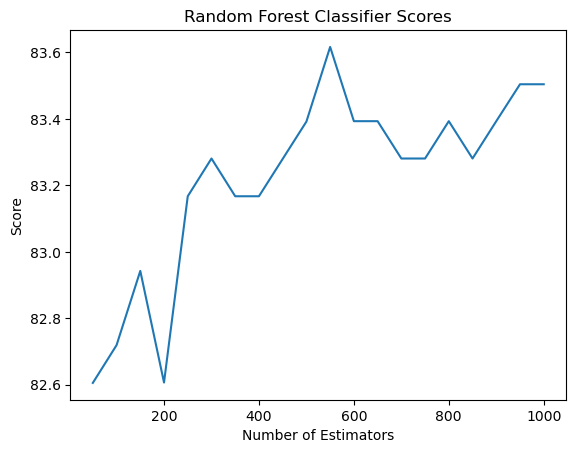

In [20]:
import matplotlib.pyplot as plt

# Plot the scores against the number of estimators
n_estimators_range = range(50, 1050, 50)
plt.plot(n_estimators_range, scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Random Forest Classifier Scores')
plt.show()

In [21]:
# Finding the best parameters for model 1 : KNN
scores = []
for k in range(1, 200, 2):
    scores.append(calculate_accuracy_model_3(transformed_full_X, y, k))
    
print(scores)

For  1  neighbours, Accuracy = 48.93882646691636
For  3  neighbours, Accuracy = 49.16604244694132
For  5  neighbours, Accuracy = 50.398252184769035
For  7  neighbours, Accuracy = 52.75156054931336
For  9  neighbours, Accuracy = 55.099875156054935
For  11  neighbours, Accuracy = 54.993757802746565
For  13  neighbours, Accuracy = 57.014981273408225
For  15  neighbours, Accuracy = 57.235955056179776
For  17  neighbours, Accuracy = 58.24594257178527
For  19  neighbours, Accuracy = 59.36953807740325
For  21  neighbours, Accuracy = 60.71785268414482
For  23  neighbours, Accuracy = 61.2796504369538
For  25  neighbours, Accuracy = 62.0661672908864
For  27  neighbours, Accuracy = 62.0661672908864
For  29  neighbours, Accuracy = 63.41448189762797
For  31  neighbours, Accuracy = 63.63920099875157
For  33  neighbours, Accuracy = 63.86392009987516
For  35  neighbours, Accuracy = 64.20099875156055
For  37  neighbours, Accuracy = 64.42571785268414
For  39  neighbours, Accuracy = 64.65043695380774
For

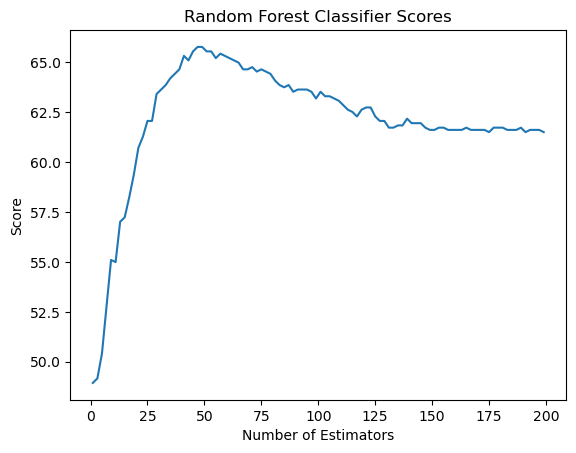

In [22]:
import matplotlib.pyplot as plt

# Plot the scores against the number of KNN with different k
k_range = range(1, 200, 2)
plt.plot(k_range, scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Random Forest Classifier Scores')
plt.show()

In [23]:
# Prepare the final model for submission
from sklearn.ensemble import VotingClassifier

# Define the model
estimators = []
estimators.append(('RF', RandomForestClassifier(n_estimators=550, random_state=0)))
estimators.append(('XGB', XGBClassifier(n_estimators=2000, learning_rate=0.01)))
estimators.append(('KNN', KNeighborsClassifier(n_neighbors=49)))

final_model = VotingClassifier(estimators = estimators, voting ='hard')
final_model.fit(transformed_full_X, y)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=550,
                                                     random_state=0)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=Non...
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=2000, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('KNN', KNeighborsClassifier(n_neighbors=49))])

In [24]:
# Save test predictions to file
preds_test = final_model.predict(transformed_test_X)
transformed_test_X.PassengerId = transformed_test_X.PassengerId.astype('Int32')
output = pd.DataFrame({'PassengerId': transformed_test_X.PassengerId,
                       'Survived': preds_test})
output.to_csv('submission.csv', index=False)

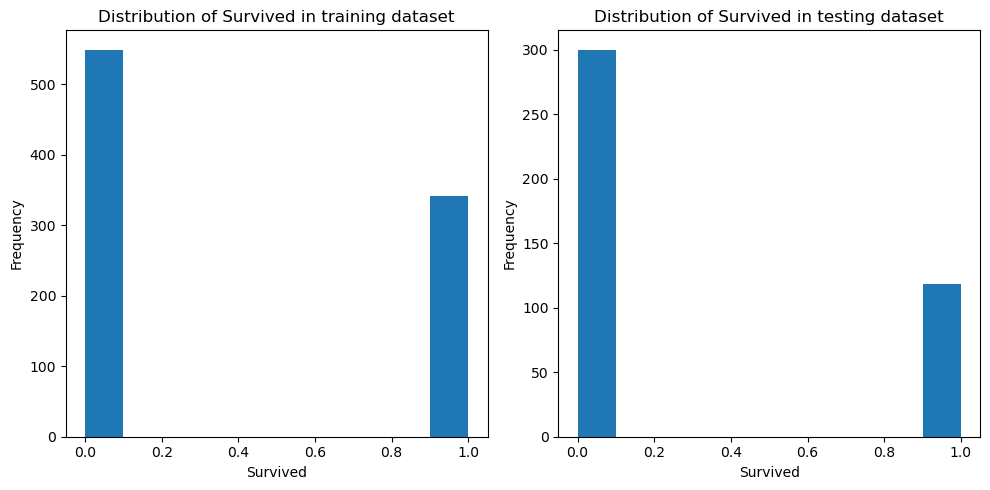

In [25]:
import matplotlib.pyplot as plt

# Show the distribution of the Survived in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of Survived in training dataset
axes[0].hist(y, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Survived in training dataset')

# Plot 2 - Distribution of Survived in testing dataset
axes[1].hist(preds_test, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Survived in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()